In [ ]:
#! pip install keras
#! pip install cntk
#! pip install tensorflow

In [1]:
%pwd

'C:\\Users\\supervisor\\巨匠楊老師的第三階段課程\\20191124-DAT236x Deep Learning Explained II\\PM-RNN'

In [ ]:
# %timeit
# import pymssql
# import pandas as pd
# conn = pymssql.connect(server="10.30.48.148" , database = 'cmonitor' , port=1433)  
# stmt = """SELECT [SQLProcessUtilization]                 
#           FROM   [dbo].[tblWmiSessions] 
#           WHERE  ComputerName='localhost' AND 
#                  [EventTime] between '2017/1/1 00:00:00' and '2018/12/31 23:59:59' """
# # Excute Query here
# df = pd.read_sql(stmt,conn)

In [1]:
import pandas as pd
df = pd.read_csv('data.csv', index_col= 0)
df[:100]
df[-3:]

,SQLProcessUtilization
726270,7
726271,7
726272,6


In [2]:
print(df.SQLProcessUtilization[-500:].to_list())  #最後五百筆資料,前十筆features第11筆label

[11, 17, 11, 11, 11, 11, 10, 11, 11, 10, 7, 13, 8, 9, 10, 10, 8, 13, 8, 8, 11, 10, 9, 8, 8, 14, 7, 8, 7, 8, 9, 8, 8, 14, 8, 7, 15, 8, 7, 1, 1, 1, 1, 2, 2, 1, 1, 9, 2, 1, 4, 4, 4, 10, 10, 10, 9, 9, 7, 15, 15, 9, 8, 8, 16, 8, 8, 8, 16, 16, 13, 8, 8, 6, 6, 6, 9, 14, 14, 8, 8, 11, 7, 7, 7, 6, 6, 7, 7, 15, 7, 20, 20, 14, 10, 10, 14, 7, 7, 21, 8, 8, 7, 15, 10, 15, 8, 10, 10, 15, 9, 10, 8, 8, 10, 10, 10, 16, 16, 12, 12, 14, 14, 13, 8, 8, 8, 12, 8, 14, 14, 14, 8, 9, 12, 12, 13, 23, 19, 36, 2, 6, 1, 10, 8, 5, 7, 1, 5, 1, 3, 10, 7, 7, 0, 1, 1, 1, 3, 2, 2, 1, 11, 3, 1, 1, 2, 2, 1, 2, 9, 7, 17, 4, 11, 3, 1, 8, 1, 2, 1, 1, 2, 1, 1, 8, 1, 1, 1, 4, 4, 1, 2, 1, 1, 8, 3, 1, 6, 1, 1, 8, 8, 2, 1, 1, 2, 1, 1, 8, 1, 3, 2, 1, 2, 1, 9, 2, 1, 1, 13, 2, 1, 1, 1, 6, 7, 2, 1, 1, 1, 1, 6, 1, 11, 1, 6, 2, 1, 1, 2, 2, 1, 1, 2, 6, 1, 2, 1, 6, 2, 2, 2, 2, 9, 1, 0, 1, 2, 6, 0, 1, 1, 1, 9, 1, 1, 1, 2, 1, 1, 1, 1, 8, 8, 7, 7, 4, 1, 1, 1, 7, 1, 1, 3, 3, 7, 3, 3, 3, 11, 11, 7, 7, 13, 7, 7, 13, 7, 7, 9, 1, 11, 7, 7, 1, 0, 

In [3]:
from numpy import array

sequence = df.SQLProcessUtilization[-1000:].to_list() #抓後1000筆來分析  

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()   #先創立兩個空串列等等要append資料進去
    for i in range(len(sequence)):     #總共會迭代sequence長度那麼多次
        # find the end of this pattern
        end_ix = i + n_steps           #最後的一項是i+n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:   #因為這樣就抓不到label了,所以break
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]   #設定features為第i項到第最後一項的前一項,然後最後一項就為label
        X.append(seq_x)   #X_list和y_list都隨著迭代有值加進去
        y.append(seq_y)
    return array(X), array(y)

n_steps = 14
X, y = split_sequence(sequence, n_steps)
top = 3
for i in zip(X[:top], y[:top]):
    print(i)

(array([10, 10,  1,  1,  1,  1,  1,  2,  6,  1,  1,  2,  2,  2]), 1)
(array([10,  1,  1,  1,  1,  1,  2,  6,  1,  1,  2,  2,  2,  1]), 1)
(array([1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 2, 2, 1, 1]), 1)


In [22]:
from keras import Sequential
from keras.layers import LSTM, Dense, Bidirectional
n_features = 1
# define model
#simple RNN
#LSTM
#Bidirectional LSTM
model = Sequential()
model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(500, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 14, 300)           362400    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 1000)              3204000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 3,567,401
Trainable params: 3,567,401
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fit# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# fit model
history = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
986/986 [==============================] - 15s 15ms/step - loss: 130.9688
Epoch 2/20
986/986 [==============================] - 14s 14ms/step - loss: 57.3656
Epoch 3/20
986/986 [==============================] - 14s 14ms/step - loss: 38.3370
Epoch 4/20
986/986 [==============================] - 14s 14ms/step - loss: 33.2684
Epoch 5/20
986/986 [==============================] - 14s 14ms/step - loss: 29.2901
Epoch 6/20
986/986 [==============================] - 14s 14ms/step - loss: 28.8005
Epoch 7/20
986/986 [==============================] - 14s 15ms/step - loss: 28.3898
Epoch 8/20
986/986 [==============================] - 14s 15ms/step - loss: 25.8107
Epoch 9/20
986/986 [==============================] - 14s 14ms/step - loss: 24.6203
Epoch 10/20
986/986 [==============================] - 14s 14ms/step - loss: 29.1769
Epoch 11/20
986/986 [==============================] - 14s 14ms/step - loss: 24.8367
Epoch 12/20
986/986 [==============================] - 15s 15ms/step - lo

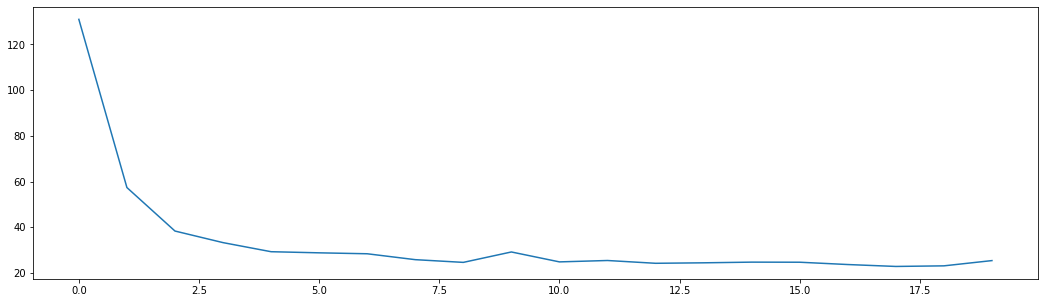

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.plot(range(len(history.history['loss'])), history.history['loss']  )

history.history['loss']
plt.show()

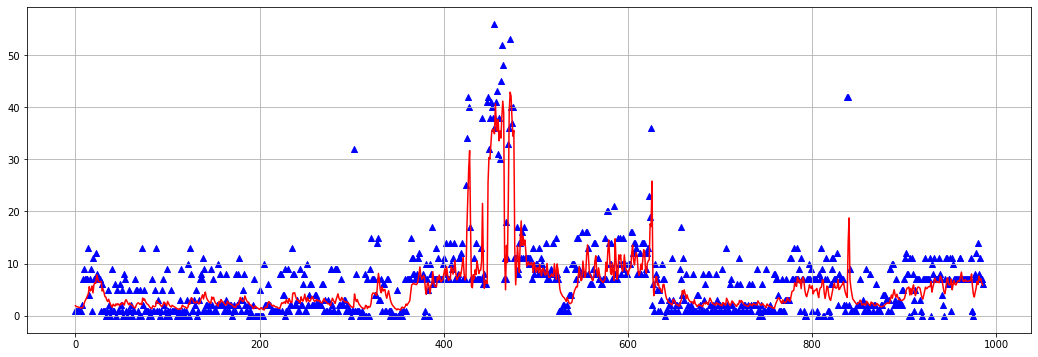

In [25]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred.shape[0]), y_pred.flatten(), color='red'   )
plt.scatter(range(len(y)), y, color='blue', marker='^'   )
plt.grid()
plt.show()

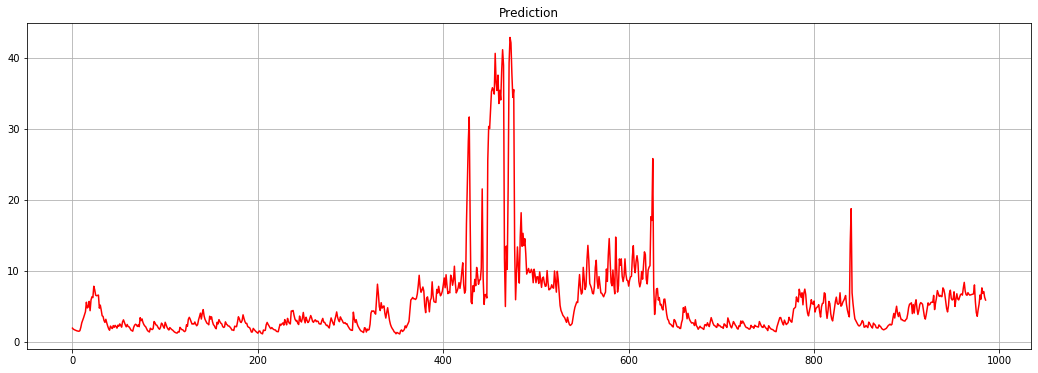

In [28]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred.shape[0]), y_pred.flatten(), color='red'  )
plt.title("Prediction")
plt.grid()
plt.show()

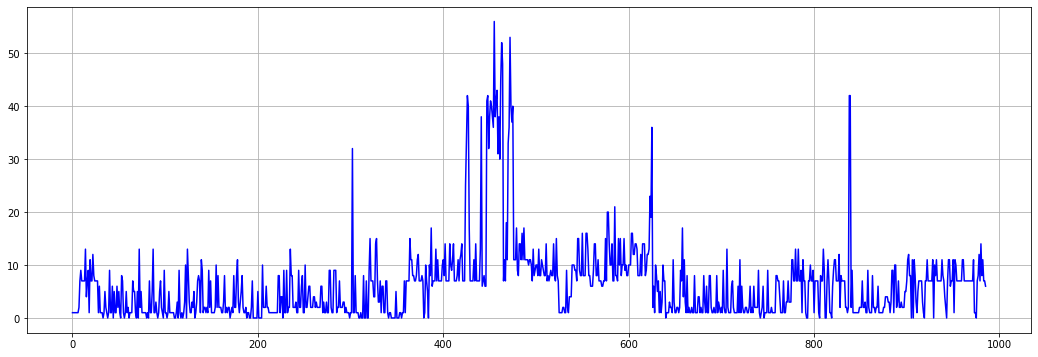

In [29]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.plot(range(len(y)), y, color='blue'   )
plt.grid()
plt.show()

In [10]:
#array(sequence[-1 * n_steps-1:-1])

In [11]:
#sequence[-1 * n_steps-1:]

In [12]:
#X[-1].flatten() , y[-1]

In [33]:
# verify last one
import numpy as np
X_test = array(sequence[-1 * n_steps -1 :-1])
#print(X_test)
X_test = X_test.reshape(-1, n_steps)
#print(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#print(X_test.shape)
y_test = y[-1:]
y_pred = model.predict(X_test)[0]
print(y_test[0], '-->', y_pred[0])
print('Error ',np.abs( y_pred - y_test)[0] / y_test[0]* 100, '%' ) 

6 --> 5.884898
Error  1.9183635711669922 %


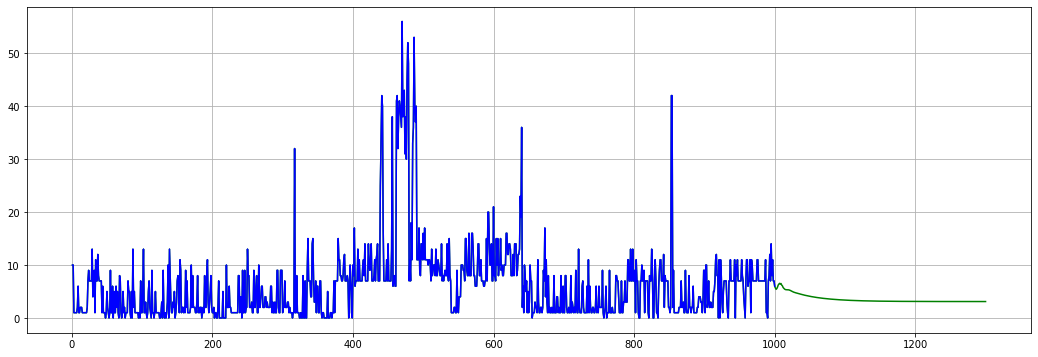

In [34]:
#predict next 300 timesplot

import numpy as np
import matplotlib.pyplot as plt
next_time = 300
hist = sequence[-1 * n_steps:]
X_test = array(hist).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

pred = sequence.copy()

for i in range(next_time):
    nx = model.predict(X_test)[0][0]
    pred.append(nx)    
    data = pred[-1 * n_steps:]
    X_test = array(data).reshape(-1, n_steps).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred)), pred, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()

In [36]:
X_train_ml = X.reshape(X.shape[0], X.shape[1])
y_train_ml = y.copy()
X_train_ml[-1:]

array([[ 7, 11,  1,  1,  0,  7,  8, 12,  7, 14,  8, 11,  7,  7]])

In [37]:
# machine learning

import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_ml, y_train_ml)

print(reg.score(X_train_ml, y_train_ml))
print(reg.coef_)
print(reg.intercept_ )


0.5689100235426053
[ 0.06029253 -0.02286018  0.02676896  0.03200735 -0.00974775  0.00305062
  0.06654209  0.05707962  0.0580493  -0.02529497  0.03798104  0.00339245
  0.1228227   0.49207359]
0.6428864658296236


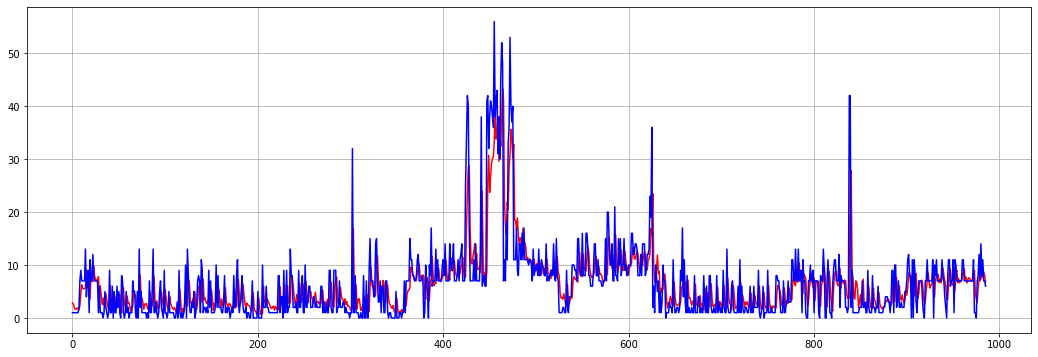

In [38]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred_ml.shape[0]), y_pred_ml.flatten(), color='red'   )
plt.plot(range(len(y_train_ml)), y_train_ml, color='blue'   )
plt.grid()
plt.show()

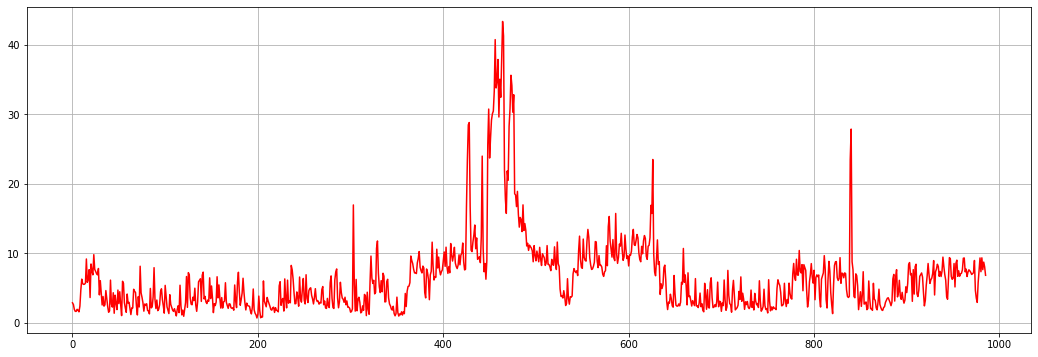

In [39]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred_ml.shape[0]), y_pred_ml.flatten(), color='red'   )
plt.grid()
plt.show()

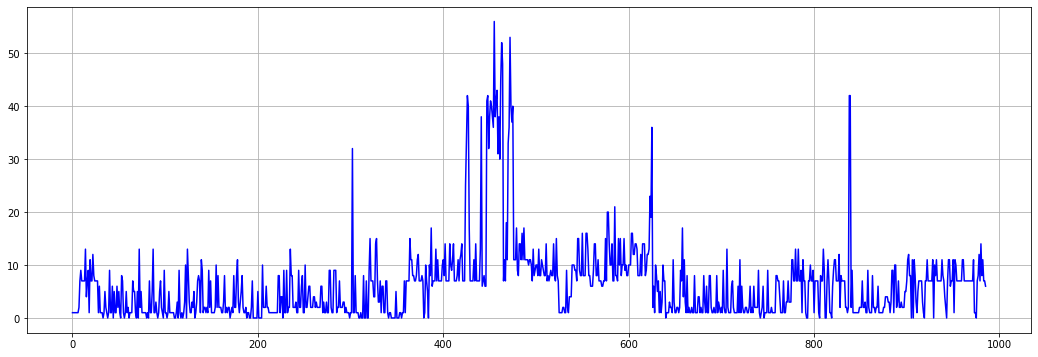

In [40]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.plot(range(len(y_train_ml)), y_train_ml, color='blue'   )
plt.grid()
plt.show()

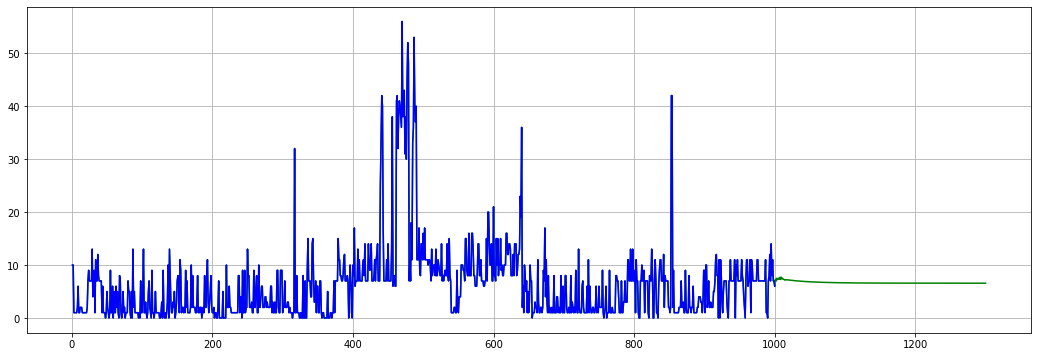

In [41]:
# prediction with machine learning

#predict next 300 timesplot

import numpy as np
import matplotlib.pyplot as plt
next_time = 300
hist_ml = sequence[-1 * n_steps:]
X_test = array(hist_ml).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

pred_ml = sequence.copy()

for i in range(next_time):
    nx = reg.predict(X_test)[0]
    pred_ml.append(nx)    
    data = pred_ml[-1 * n_steps:]
    X_test = array(data).reshape(-1, n_steps).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred_ml)), pred_ml, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()
